<a href="https://colab.research.google.com/github/Gagansherigar/MachineLearning/blob/main/CaliforniaHousepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing


importing bostan house price dataset

In [5]:
house_price_dataset=fetch_california_housing(as_frame=True)

In [9]:
print(house_price_dataset)

{'data':        MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns], 'target': 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    

In [10]:
house_price_dataFrame=pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
house_price_dataFrame["MedHouseVal"] = house_price_dataset.target


In [14]:
house_price_dataFrame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
house_price_dataFrame.shape

(20640, 9)

checking for missing value

In [18]:
house_price_dataFrame.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [19]:
house_price_dataFrame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
#getting correlation b/w the values
correlation=house_price_dataFrame.corr()

constructing heat map

<Axes: >

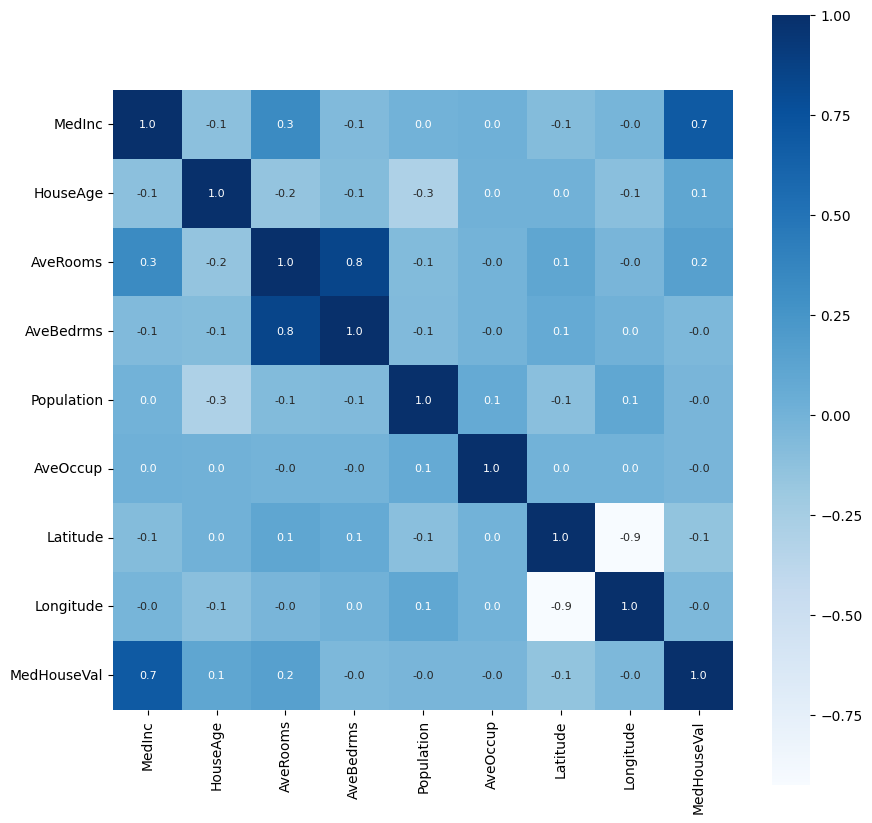

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

Splitting data


In [30]:
X=house_price_dataFrame.drop(['MedHouseVal'],axis=1)
Y=house_price_dataFrame['MedHouseVal']

In [31]:
print(X,Y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns] 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

split train test

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [58]:
print(X.shape,X_test,X_train)

(20640, 8)        MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
10385  6.4114      15.0  7.527559  ...  3.318898     33.60    -117.65
1943   4.1843      12.0  6.330084  ...  2.831476     38.62    -120.91
7490   1.7411      35.0  5.369159  ...  4.247664     33.93    -118.23
16889  3.4412      39.0  4.173405  ...  1.937107     37.59    -122.37
11416  7.8195      16.0  8.602349  ...  3.593960     33.70    -117.98
...       ...       ...       ...  ...       ...       ...        ...
13767  4.8173      25.0  6.160494  ...  2.644444     34.04    -117.12
20606  2.0800      30.0  5.140316  ...  3.363636     39.12    -121.57
7340   2.1743      30.0  3.364395  ...  4.461752     33.97    -118.16
14312  1.6023      32.0  3.878788  ...  4.045455     32.70    -117.14
20262  4.2227      28.0  4.899533  ...  2.985981     34.21    -119.19

[4128 rows x 8 columns]        MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
2072   1.4817       6.0  4.443645  ...  3.350120     3

XGboost regression model

In [59]:
model=XGBRegressor()

In [60]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluation


In [61]:
#prediction of training data
predictions=model.predict(X_train)


In [62]:
print(predictions)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


R square error and mean abouslute


In [63]:
score_1=metrics.r2_score(Y_train,predictions)
#mean absoulte
score_2=metrics.mean_absolute_error(Y_train,predictions)

In [64]:
print("R sqaure",score_1)
print("mean absolute",score_2)

R sqaure 0.943650140819218
mean absolute 0.1933648700612105


visualization of actual price and predicted price

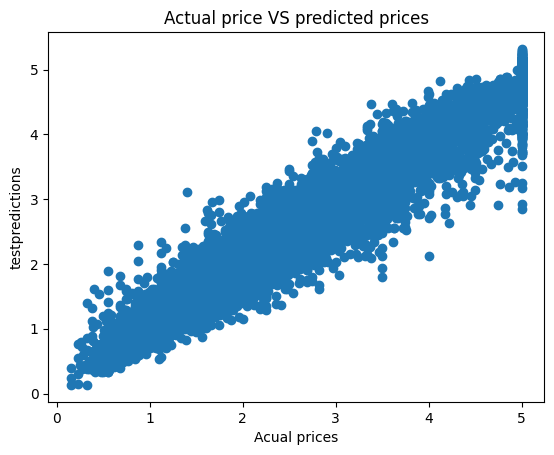

In [67]:
plt.scatter(Y_train,predictions)
plt.xlabel("Acual prices")
plt.ylabel("testpredictions")
plt.title("Actual price VS predicted prices")
plt.show()

prediction on test data

In [49]:
testpredictions=model.predict(X_test)

In [54]:
score_1=metrics.r2_score(Y_test,predictions)
#mean absoulte
score_2=metrics.mean_absolute_error(Y_test,testpredictions)

In [55]:
print("R sqaure",score_1)
print("mean absolute",score_2)

R sqaure 0.8338000331788725
mean absolute 0.3108631800268186
